This notebook generates figureS 2, 3 and 4 of de Sá, Bernardo et al. (2024).

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import sys
sys.path.append('..')
from src.zams import CompanionFrequencyDistribution, MassRatioDistribution, EccentricityDistribution
from src.constants import LOGE, LN10

In [2]:
plt.style.use('./plotstyle.mplstyle')
FIGURE_FOLDER = Path('./figures')

In [3]:
def normalized(array):
    norm = np.linalg.norm(array)
    return array/norm

## Mass ratio

In [4]:
plot_qs = np.linspace(0.1,1,50)
plot_m1s = np.array([0.8, 1.5, 2, 4, 10, 50])
plot_logps = np.concatenate(([0.21, 0.4, 0.6, 0.8, 1.0], np.arange(2, 9, 2)))

plot_p_qs_array = np.empty((plot_m1s.shape[0], 
                            plot_logps.shape[0], 
                            plot_qs.shape[0]), np.float64)

q_distr = MassRatioDistribution()
for m1_i, m1 in enumerate(plot_m1s):
    for logp_i, logp in enumerate(plot_logps):
        q_distr.set_parameters(m1, logp)
        for q_i, q in enumerate(plot_qs):
            plot_p_qs_array[m1_i, logp_i, q_i] = q_distr.prob(q)

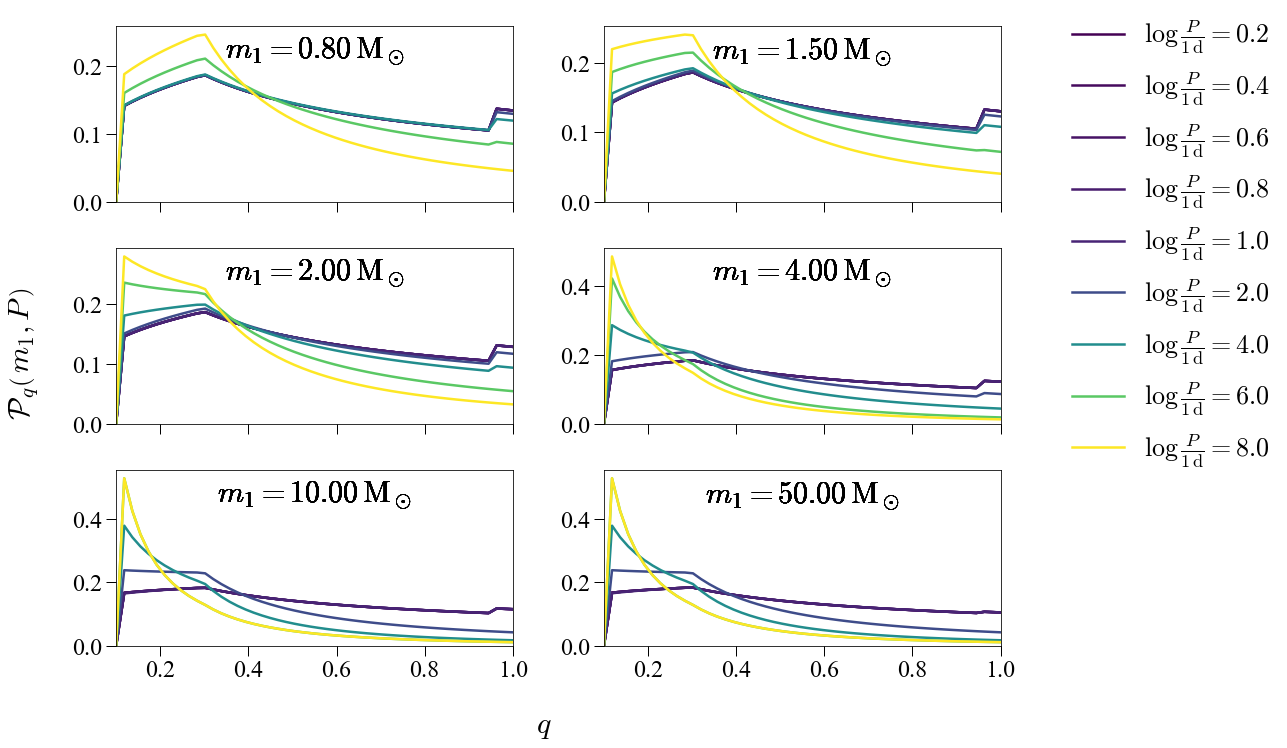

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(14,10), sharex=True, sharey=False, tight_layout=True)
axes = axs.flatten()
logp_cnorm = plot_logps.max() - plot_logps.min()

for ax, m1, plot_m1_array in zip(axes, plot_m1s, plot_p_qs_array):
    for logp, plot_logp_array in zip(plot_logps, plot_m1_array):
        c = cm.viridis((logp-plot_logps.min())/logp_cnorm)
        ax.plot(plot_qs, normalized(plot_logp_array), c=c, label = r'$\log \frac{P}{1\,\mathrm{d}} = %.1f$' % logp, lw=2.5)
        ax.text(0.5, 0.95, r'$m_1 = %.2f\,\mathrm{M}_\odot$' % m1, ha='center', va='top', transform=ax.transAxes)
        
for ax in axes:
    ax.set_xlim(0.1, 1)
    ax.set_ylim(0)
    
fig.legend(*axes[1].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
fig.text(0.5, 0, '$q$', va='top', ha='center')
fig.text(0, 0.5, r'$\mathcal{P}_q\left(\,m_1,P\,\right)$', rotation=90, va='center', ha='right')

fig.savefig(FIGURE_FOLDER/'q_pM1_distr.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'q_pM1_distr.png', bbox_inches='tight')

In [89]:
plot_qs = np.linspace(0.1,1,50)
plot_m1s = np.array([0.8, 2, 10])
plot_logps = np.array([0.21, 1.3, 2, 5, 6, 8])

plot_p_qs_array = np.empty((plot_m1s.shape[0], 
                            plot_logps.shape[0], 
                            plot_qs.shape[0]), np.float64)

q_distr = MassRatioDistribution()
for m1_i, m1 in enumerate(plot_m1s):
    for logp_i, logp in enumerate(plot_logps):
        q_distr.set_parameters(m1, logp)
        for q_i, q in enumerate(plot_qs):
            plot_p_qs_array[m1_i, logp_i, q_i] = q_distr.prob(q)

Figure 2

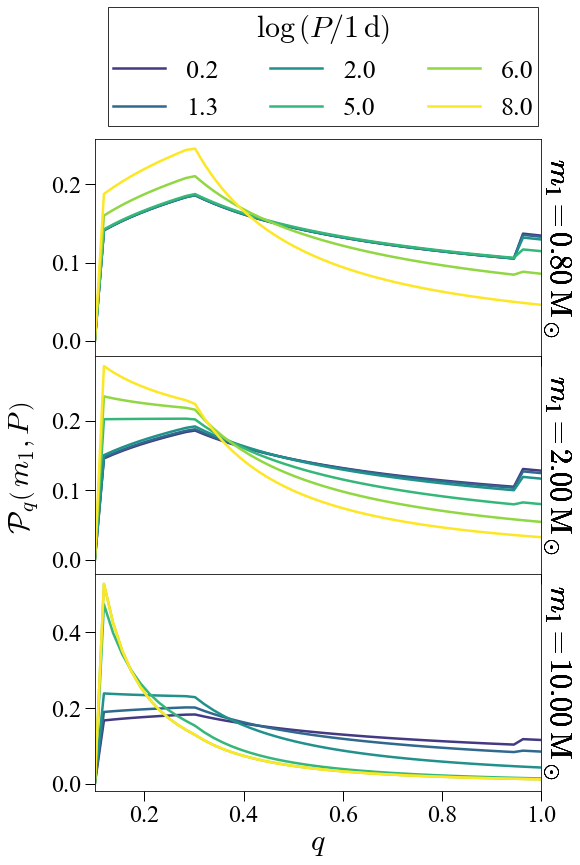

In [90]:
fig, axes = plt.subplots(3, 1, figsize=(8,12), sharex=True, sharey=False, tight_layout=False)
fig.subplots_adjust(hspace=0, wspace=0)
rect = fig.patch
rect.set_facecolor('white')
axes = axes.flatten()
logp_cnorm = plot_logps.max() - plot_logps.min()

for ax, m1, plot_m1_array in zip(axes, plot_m1s, plot_p_qs_array):
    for i, (logp, plot_logp_array) in enumerate(zip(plot_logps, plot_m1_array)):
        #c = cm.viridis((logp-plot_logps.min())/logp_cnorm)
        c = cm.viridis((i+1)/len(plot_logps))
        ax.plot(plot_qs, normalized(plot_logp_array), c=c, label = f'{logp:.1f}', lw=2.5)
        ax.text(1, 0.5, r'$m_1 = %.2f\,\mathrm{M}_\odot$' % m1, rotation=-90, ha='left', va='center', transform=ax.transAxes)
        
for ax in axes:
    ax.set_xlim(0.1, 1)
    ax.set_ylim(-0.02)
    
#axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
axes[-1].set_xlabel('$q$')
#fig.text(0.5, 0, '$q$', va='top', ha='center')
fig.text(0.03, 0.5, r'$\mathcal{P}_q\left(\,m_1,P\,\right)$', rotation=90, va='center', ha='right')

axes[0].legend(frameon=True, title=r'$\log\left(P/1\,\mathrm{d}\right)$', loc='lower left', bbox_to_anchor=(0,1), ncol=3, edgecolor='black', fancybox=False, borderpad=0.2, fontsize=26)

fig.savefig(FIGURE_FOLDER/'q_pM1_distr_tall.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'q_pM1_distr_tall.png', bbox_inches='tight')

In [14]:
plot_qs = np.linspace(0.1,1.01,50)
plot_m1s = np.array([0.8, 1.5, 2, 10])
plot_logps = np.concatenate(([0.21, 0.4, 0.6, 0.8, 1.0], np.arange(2, 9, 2)))

plot_p_qs_array = np.empty((plot_m1s.shape[0], 
                            plot_logps.shape[0], 
                            plot_qs.shape[0]), np.float64)

q_distr = MassRatioDistribution()
for m1_i, m1 in enumerate(plot_m1s):
    for logp_i, logp in enumerate(plot_logps):
        q_distr.set_parameters(m1, logp)
        for q_i, q in enumerate(plot_qs):
            plot_p_qs_array[m1_i, logp_i, q_i] = q_distr.prob(q)

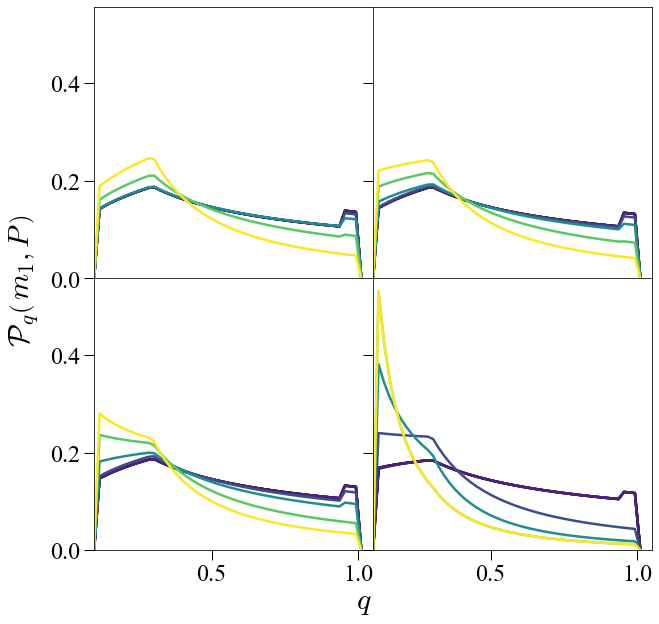

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True, tight_layout=False)
fig.subplots_adjust(hspace=0, wspace=0)
rect = fig.patch
rect.set_facecolor('white')
axes = axs.flatten()
logp_cnorm = plot_logps.max() - plot_logps.min()

for ax, m1, plot_m1_array in zip(axes, plot_m1s, plot_p_qs_array):
    for logp, plot_logp_array in zip(plot_logps, plot_m1_array):
        c = cm.viridis((logp-plot_logps.min())/logp_cnorm)
        ax.plot(plot_qs, normalized(plot_logp_array), c=c, label = r'$\log \frac{P}{1\,\mathrm{d}} = %.1f$' % logp, lw=2.5)
        #ax.text(0.55, 0.95, r'$m_1 = %.2f\,\mathrm{M}_\odot$' % m1, ha='center', va='top', transform=ax.transAxes)
        
for ax in axes:
    ax.set_xlim(0.1, 1.05)
    ax.set_ylim(0)
    
#fig.legend(*axes[1].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
#axes[-1].set_xlabel('$q$')
fig.text(0.5, 0.07, '$q$', va='top', ha='center')
fig.text(0.05, 0.5, r'$\mathcal{P}_q\left(\,m_1,P\,\right)$', rotation=90, va='center', ha='right')

fig.savefig(FIGURE_FOLDER/'q_pM1_distr_mini.png', bbox_inches='tight')

## Eccentricity

In [16]:
ecc = EccentricityDistribution()

In [17]:
ecc.set_parameters(1,0.51)

In [18]:
ecc.k,ecc.eta

(2.723053046586339e-67, -69.39999999999993)

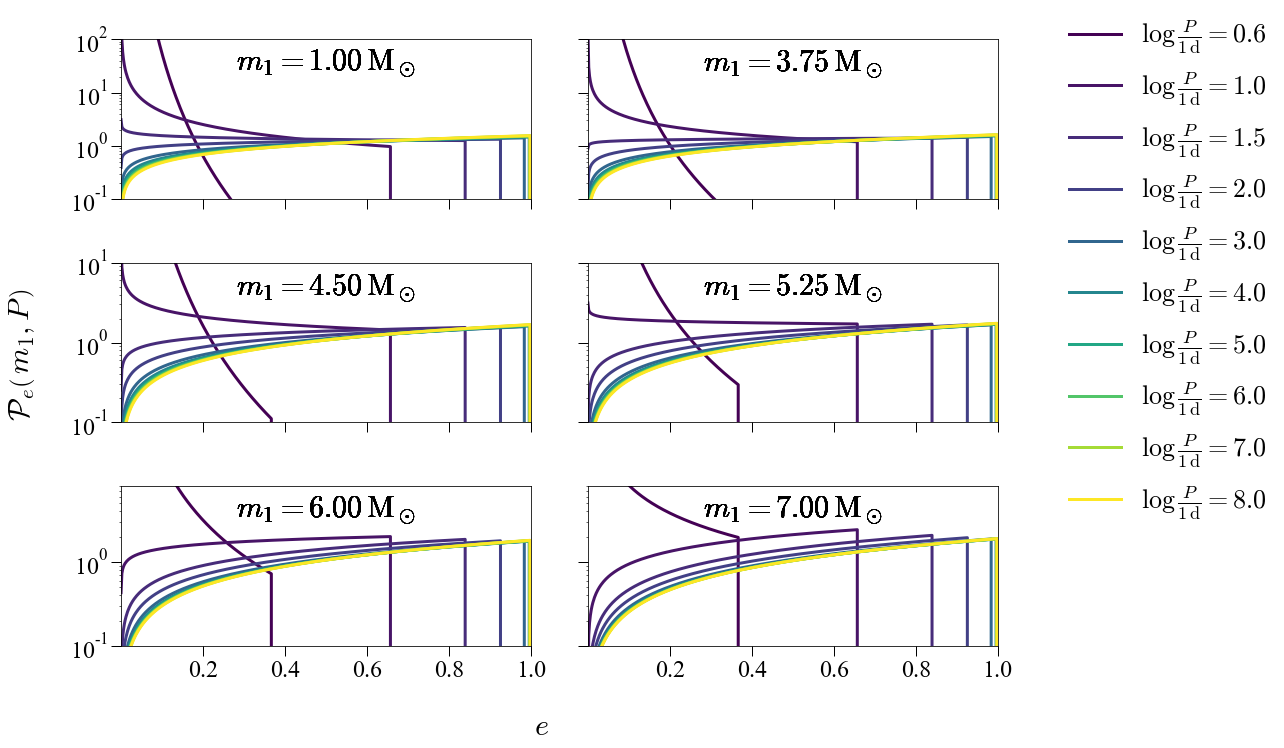

In [19]:
plot_es = np.linspace(0, 1, 500)
plot_m1s = np.array([1, 3.75, 4.5, 5.25, 6, 7])
plot_logps = np.concatenate(([0.6, 1, 1.5], np.arange(2, 9, 1)))

plot_p_es_array = np.empty((plot_m1s.shape[0], 
                            plot_logps.shape[0], 
                            plot_es.shape[0]), np.float64)

e_distr = EccentricityDistribution()
for m1_i, m1 in enumerate(plot_m1s):
    for logp_i, logp in enumerate(plot_logps):
        for e_i, e in enumerate(plot_es):
            e_distr.set_parameters(m1, logp)
            plot_p_es_array[m1_i, logp_i, e_i] = e_distr.prob(e)

fig, axs = plt.subplots(3, 2, figsize=(14,10), sharex='col', sharey='row', tight_layout=True)
axes = axs.flatten()
logp_cnorm = plot_logps.max() - plot_logps.min()

for ax, m1, plot_m1_array in zip(axes, plot_m1s, plot_p_es_array):
    for logp, plot_logp_array in zip(plot_logps, plot_m1_array):
        c = cm.viridis((logp-plot_logps.min())/logp_cnorm)
        ax.plot(plot_es, plot_logp_array, c=c, label = r'$\log\frac{P}{1\,\mathrm{d}} = %.1f$' % logp, lw=3)
        ax.text(0.5, 0.95, f'$m_1 = %.2f\,\mathrm{{M}}_\odot$' % m1, ha='center', va='top', transform=ax.transAxes)
        
for ax in axes:
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlim(0.001, 1)
    ax.tick_params(which='both')

axs[0,0].set_ylim(0.1,100)
axs[1,0].set_ylim(0.1,10)
axs[2,0].set_ylim(0.1,8)
    
fig.legend(*axes[1].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
fig.text(0.5, 0, r'$e$', ha='center', va='top')
fig.text(0, 0.5, r'$\mathcal{P}_e\left(\,m_1,P\,\right)$', rotation=90, ha='right', va='center')

fig.savefig(FIGURE_FOLDER/'e_pM1_dist.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'e_pM1_dist.png', bbox_inches='tight')

Figure 3

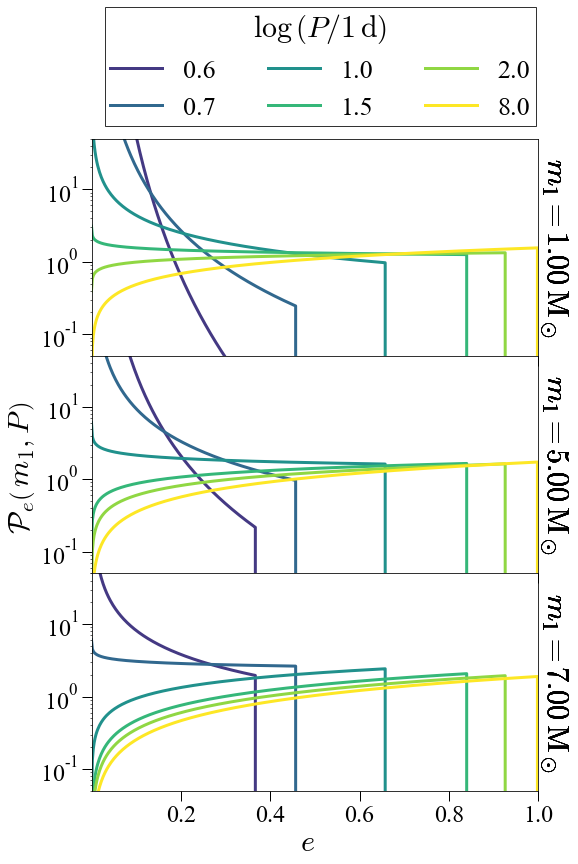

In [63]:
plot_es = np.linspace(0, 1, 500)
plot_m1s = np.array([1, 5, 7])
plot_logps = np.array(([0.6, 0.7, 1, 1.5, 2, 8]))

plot_p_es_array = np.empty((plot_m1s.shape[0], 
                            plot_logps.shape[0], 
                            plot_es.shape[0]), np.float64)

e_distr = EccentricityDistribution()
for m1_i, m1 in enumerate(plot_m1s):
    for logp_i, logp in enumerate(plot_logps):
        for e_i, e in enumerate(plot_es):
            e_distr.set_parameters(m1, logp)
            plot_p_es_array[m1_i, logp_i, e_i] = e_distr.prob(e)

fig, axes = plt.subplots(3, 1, figsize=(8,12), sharex=True, sharey=False, tight_layout=False)
fig.subplots_adjust(hspace=0, wspace=0)
rect = fig.patch
rect.set_facecolor('white')
axes = axes.flatten()
logp_cnorm = plot_logps.max() - plot_logps.min()

for ax, m1, plot_m1_array in zip(axes, plot_m1s, plot_p_es_array):
    for i, (logp, plot_logp_array) in enumerate(zip(plot_logps, plot_m1_array)):
        #c = cm.viridis((logp-plot_logps.min())/logp_cnorm)
        c = cm.viridis((i+1)/len(plot_logps))
        ax.plot(plot_es, plot_logp_array, c=c, label=f'{logp:.1f}', lw=3)
        ax.text(1, 0.5, r'$m_1 = %.2f\,\mathrm{M}_\odot$' % m1, rotation=-90, ha='left', va='center', transform=ax.transAxes)
        
for ax in axes:
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlim(0.001, 1)
    ax.tick_params(which='both')

axes[0].set_ylim(0.05,50)
axes[1].set_ylim(0.05,50)
axes[2].set_ylim(0.05,50)
    
#fig.legend(*axes[1].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(0.95, 0.9), frameon=False)
fig.text(0.5, 0.08, r'$e$', ha='center', va='top')
fig.text(0.03, 0.5, r'$\mathcal{P}_e\left(\,m_1,P\,\right)$', rotation=90, ha='right', va='center')
axes[0].legend(frameon=True, title=r'$\log\left(P/1\,\mathrm{d}\right)$', loc='lower left', bbox_to_anchor=(0,1), ncol=3, edgecolor='black', fancybox=False, borderpad=0.2, fontsize=26)

fig.savefig(FIGURE_FOLDER/'e_pM1_dist_tall.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'e_pM1_dist_tall.png', bbox_inches='tight')

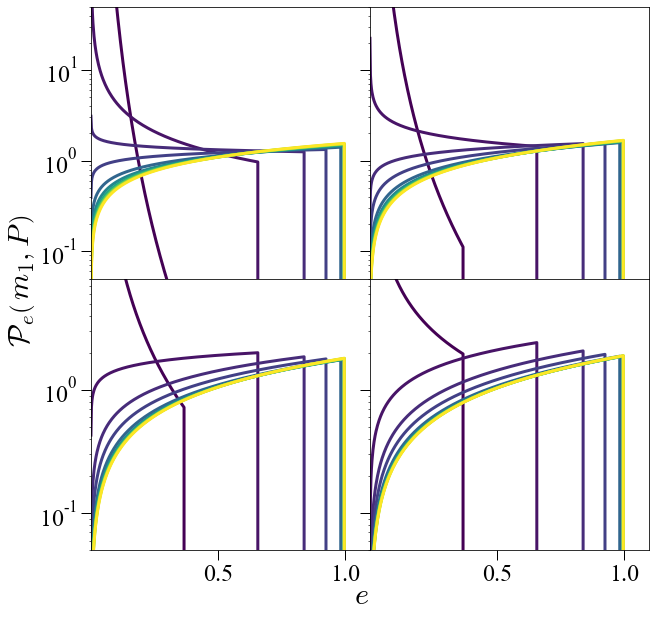

In [35]:
plot_es = np.linspace(0, 1, 500)
plot_m1s = np.array([1, 4.5, 6, 7])
plot_logps = np.concatenate(([0.6, 1, 1.5], np.arange(2, 9, 1)))

plot_p_es_array = np.empty((plot_m1s.shape[0], 
                            plot_logps.shape[0], 
                            plot_es.shape[0]), np.float64)

e_distr = EccentricityDistribution()
for m1_i, m1 in enumerate(plot_m1s):
    for logp_i, logp in enumerate(plot_logps):
        for e_i, e in enumerate(plot_es):
            e_distr.set_parameters(m1, logp)
            plot_p_es_array[m1_i, logp_i, e_i] = e_distr.prob(e)

fig, axs = plt.subplots(2,2, figsize=(10, 10), sharex='col', sharey='row', tight_layout=False)
fig.subplots_adjust(hspace=0, wspace=0)
rect = fig.patch
rect.set_facecolor('white')
axes = axs.flatten()
logp_cnorm = plot_logps.max() - plot_logps.min()

for ax, m1, plot_m1_array in zip(axes, plot_m1s, plot_p_es_array):
    for logp, plot_logp_array in zip(plot_logps, plot_m1_array):
        c = cm.viridis((logp-plot_logps.min())/logp_cnorm)
        ax.plot(plot_es, plot_logp_array, c=c, label = r'$\log\frac{P}{1\,\mathrm{d}} = %.1f$' % logp, lw=3)
 #       ax.text(0.5, 0.95, f'$m_1 = %.2f\,\mathrm{{M}}_\odot$' % m1, ha='center', va='top', transform=ax.transAxes)
        
for ax in axes:
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlim(0.001, 1.1)
    ax.tick_params(which='both')

axes[0].set_ylim(0.05,100)
axes[1].set_ylim(0.05,50)
axes[2].set_ylim(0.05,8)
    
#fig.legend(*axes[1].get_legend_handles_labels(), loc='upper left', bbox_to_anchor=(0.95, 0.9), frameon=False)
fig.text(0.5, 0.08, r'$e$', ha='center', va='top')
fig.text(0.05, 0.5, r'$\mathcal{P}_e\left(\,m_1,P\,\right)$', rotation=90, ha='right', va='center')

#fig.savefig(FIGURE_FOLDER/'e_pM1_dist_tall.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'e_pM1_dist_mini.png', bbox_inches='tight')

## Orbital period

#### On the $\log P - m_1$ plane

In [91]:
plane_plot_logps = np.linspace(0.2, 7.99, 100)
plane_plot_m1s = np.linspace(0.08, 150, 1000)

plane_xx, plane_yy = np.meshgrid(plane_plot_m1s, plane_plot_logps)

plane_plot_p_logps_array = np.empty((plane_plot_m1s.shape[0], 
                                     plane_plot_logps.shape[0]), np.float64)

for m1_i, m1 in enumerate(plane_plot_m1s):
    f_distr = CompanionFrequencyDistribution(MassRatioDistribution(), m1)
    for logp_i, logp in enumerate(plane_plot_logps):
        plane_plot_p_logps_array[m1_i, logp_i] = f_distr.companion_frequency_q01(logp)
        pass

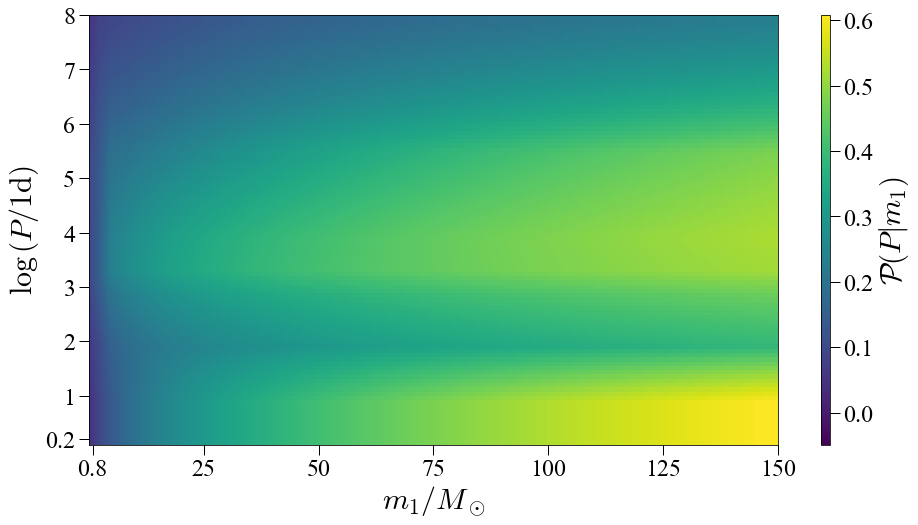

In [92]:
fig, ax = plt.subplots(figsize=(14,8), tight_layout=True)

zz = plane_plot_p_logps_array
ax.scatter(plane_xx, plane_yy, c=zz.T, cmap=cm.viridis, vmin=zz.min(), vmax=zz.max(), marker='s', s=200)

sm = cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=zz.min(), vmax=zz.max()))
cb = fig.colorbar(sm, location='right', aspect=50)
cb.set_label(label=r'$\mathcal{P}\left(P|m_1\right)$')

ax.set_ylabel(r'$\log\left(P/\mathrm{1 d}\right)$')
ax.set_ylim(0.1, 8)
ax.set_yticks(np.concatenate(([0.2], np.arange(1, 9, 1))))
ax.set_yticklabels(np.concatenate(([0.2], [f'{x:.0f}' for x in np.arange(1,9,1)])))

ax.set_xlabel(r'$m_1/M_\odot$')
ax.set_xlim(0, 150)
ax.set_xticks(np.concatenate(([0.8], np.arange(25,175,25))))
ax.set_xticklabels(np.concatenate(([0.8], [f'{x:.0f}' for x in np.arange(25,175,25)])))

fig.savefig(FIGURE_FOLDER/'p_m1_corr.pdf', bbox_inches='tight')
fig.savefig(FIGURE_FOLDER/'p_m1_corr.png', bbox_inches='tight')

/tmp/ipykernel_37585/3178420822.py:5: UserWarning: The following kwargs were not used by contour: 'algorithm'
  contours = ax.contour(plane_xx, plane_yy, zz.T, levels=10, colors='black', alpha=1, antialiased=True, linewidths=1, algorithm='threaded')


[Text(0.8, 0, '0.8'),
 Text(25.0, 0, '25'),
 Text(50.0, 0, '50'),
 Text(75.0, 0, '75'),
 Text(100.0, 0, '100'),
 Text(125.0, 0, '125'),
 Text(150.0, 0, '150')]

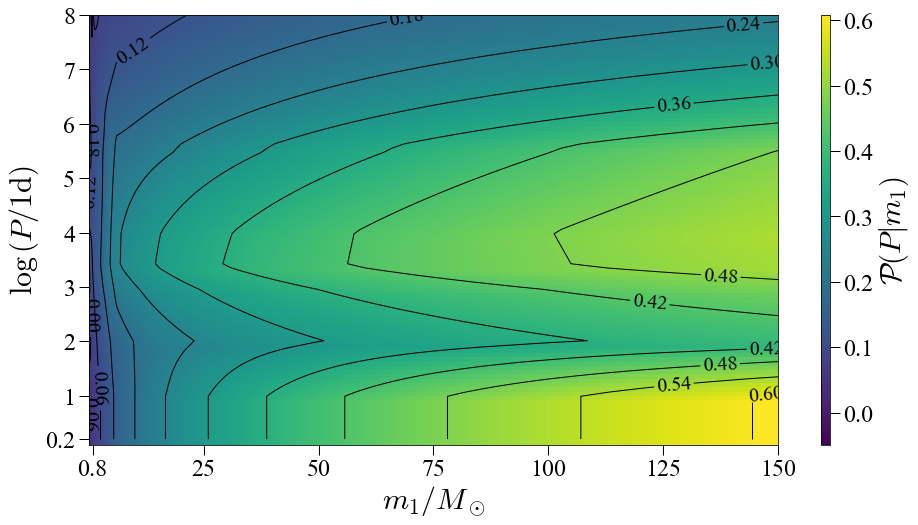

In [93]:
fig, ax = plt.subplots(figsize=(14,8), tight_layout=True)

zz = plane_plot_p_logps_array
ax.scatter(plane_xx, plane_yy, c=zz.T, cmap=cm.viridis, vmin=zz.min(), vmax=zz.max(), marker='s', s=200)
contours = ax.contour(plane_xx, plane_yy, zz.T, levels=10, colors='black', alpha=1, antialiased=True, linewidths=1, algorithm='threaded')
ax.clabel(contours, inline=True, fontsize=20)

sm = cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=zz.min(), vmax=zz.max()))
cb = fig.colorbar(sm, location='right', aspect=50)
cb.set_label(label=r'$\mathcal{P}\left(P|m_1\right)$')

ax.set_ylabel(r'$\log\left(P/\mathrm{1 d}\right)$')
ax.set_ylim(0.1, 8)
ax.set_yticks(np.concatenate(([0.2], np.arange(1, 9, 1))))
ax.set_yticklabels(np.concatenate(([0.2], [f'{x:.0f}' for x in np.arange(1,9,1)])))

ax.set_xlabel(r'$m_1/M_\odot$')
ax.set_xlim(0, 150)
ax.set_xticks(np.concatenate(([0.8], np.arange(25,175,25))))
ax.set_xticklabels(np.concatenate(([0.8], [f'{x:.0f}' for x in np.arange(25,175,25)])))

#fig.savefig(FIGURE_FOLDER/'p_m1_corr.pdf', bbox_inches='tight')
#fig.savefig(FIGURE_FOLDER/'p_m1_corr.png', bbox_inches='tight')

#### As $m_1$ slices

In [129]:
slice_plot_logps = np.linspace(0.2,8,100)
slice_plot_m1s = np.array([0.8, 2, 4, 7, 10, 20, 40, 70, 100, 150])

slice_plot_p_logps_array = np.empty((slice_plot_m1s.shape[0], 
                                     slice_plot_logps.shape[0]), np.float64)

for m1_i, m1 in enumerate(slice_plot_m1s):  
    f_distr = CompanionFrequencyDistribution(MassRatioDistribution(), m1)
    for logp_i, logp in enumerate(slice_plot_logps):
        slice_plot_p_logps_array[m1_i, logp_i] = f_distr.companion_frequency_q01(logp)

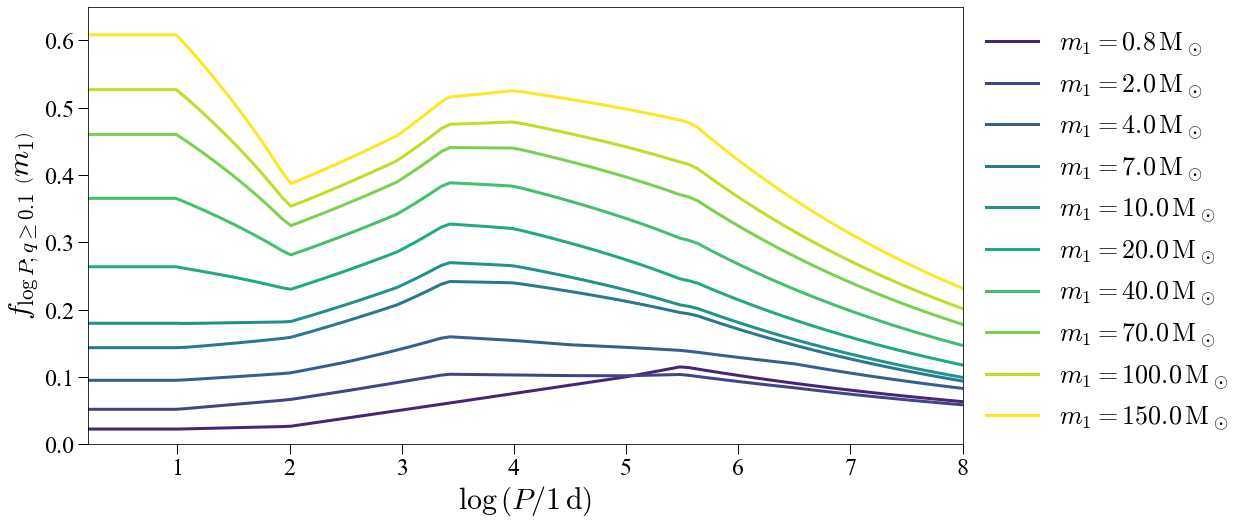

In [130]:
fig, ax = plt.subplots(figsize=(18,8), sharex='col', sharey='row', tight_layout=True)
m1_cnorm = slice_plot_m1s.max() - slice_plot_m1s.min()

i = 1
for m1, plot_m1_array in zip(slice_plot_m1s, slice_plot_p_logps_array):
    c = cm.viridis(i/len(slice_plot_m1s))
    ax.plot(slice_plot_logps, plot_m1_array, c=c, label = f'$m_1 = {{{m1:.1f}}}\,\mathrm{{M}}_\odot$', lw=3)
    i += 1
        
ax.set_xlabel(r'$\log\left(P/1\,\mathrm{d}\right)$')
ax.set_ylabel(r'$f_{\log P;q\geq0.1}\;\left(m_1\right)$')
ax.set_ylim(0, 0.65)
ax.set_xlim(0.2, 8)
ax.tick_params(which='both')
    
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False, ncol=1)
plt.savefig(FIGURE_FOLDER/'slices_p_m1_corr.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'slices_p_m1_corr.png', bbox_inches='tight')

Figure 4


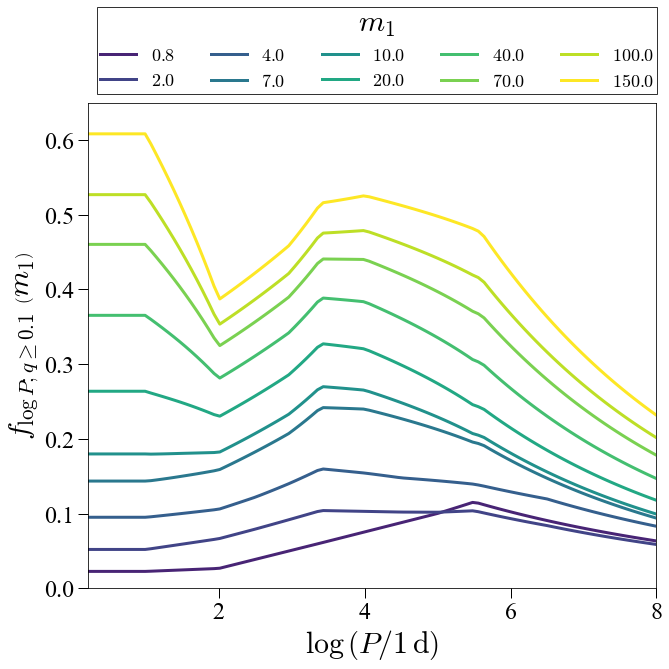

In [131]:
fig, ax = plt.subplots(figsize=(10,10), sharex='col', sharey='row', tight_layout=True)
m1_cnorm = slice_plot_m1s.max() - slice_plot_m1s.min()

i = 1
for m1, plot_m1_array in zip(slice_plot_m1s, slice_plot_p_logps_array):
    c = cm.viridis(i/len(slice_plot_m1s))
    ax.plot(slice_plot_logps, plot_m1_array, c=c, label = f'${m1:.1f}$', lw=3)
    i += 1
        
ax.set_xlabel(r'$\log\left(P/1\,\mathrm{d}\right)$')
ax.set_ylabel(r'$f_{\log P;q\geq0.1}\;\left(m_1\right)$')
ax.set_ylim(0, 0.65)
ax.set_xlim(0.2, 8)
ax.tick_params(which='both')
    
ax.legend(frameon=True, title='$m_1$', loc='lower left', bbox_to_anchor=(0,1), ncol=5, edgecolor='black', fancybox=False, borderpad=0.2, fontsize=18)

plt.savefig(FIGURE_FOLDER/'square_slices_p_m1_corr.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'square_slices_p_m1_corr.png', bbox_inches='tight')

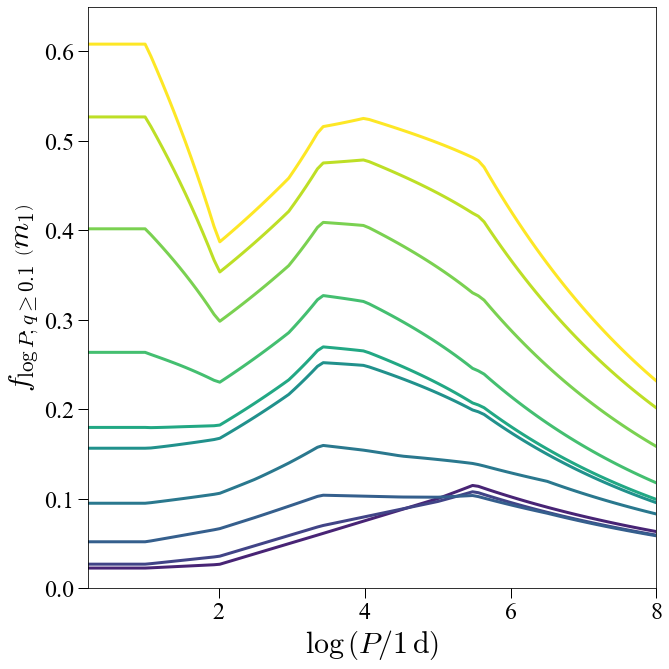

In [129]:
fig, ax = plt.subplots(figsize=(10,10), sharex='col', sharey='row', tight_layout=True)
rect = fig.patch
rect.set_facecolor('white')
m1_cnorm = slice_plot_m1s.max() - slice_plot_m1s.min()

i = 1
for m1, plot_m1_array in zip(slice_plot_m1s, slice_plot_p_logps_array):
    c = cm.viridis(i/len(slice_plot_m1s))
    ax.plot(slice_plot_logps, plot_m1_array, c=c, label = f'$m_1 = {{{m1:.1f}}}\,\mathrm{{M}}_\odot$', lw=3)
    i += 1
        
ax.set_xlabel(r'$\log\left(P/1\,\mathrm{d}\right)$')
ax.set_ylabel(r'$f_{\log P;q\geq0.1}\;\left(m_1\right)$')
ax.set_ylim(0, 0.65)
ax.set_xlim(0.2, 8)
ax.tick_params(which='both')
    
#ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False, ncol=1)
plt.savefig(FIGURE_FOLDER/'slices_p_m1_corr_mini.png', bbox_inches='tight')